In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report,r2_score

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
f1 = r"C:\Users\alokk\Desktop\New folder\spam.csv"
df = pd.read_csv(f1,encoding='latin_1',engine='python',usecols={'v1','v2'})

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.columns= ['lable','message']  

In [8]:
df.describe()

,lable,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lable    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.isnull().sum()

lable      0
message    0
dtype: int64

In [11]:
df.duplicated().values.any()

True

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.describe()

,lable,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [14]:
df.head()

,lable,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.duplicated().values.any()

False

C:\Users\alokk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


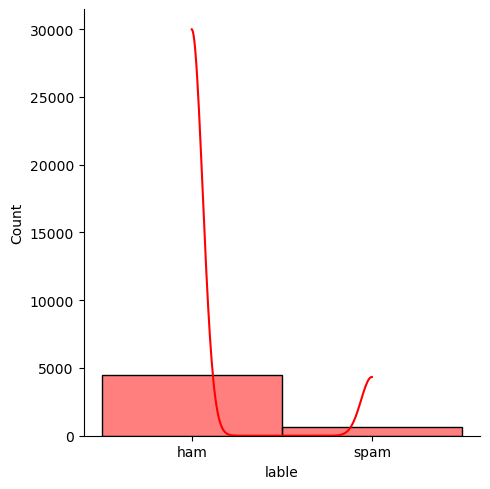

In [16]:
sns.displot(df["lable"], kde=True,color='red')


In [21]:
encoder = LabelEncoder()
df["label"]=encoder.fit_transform(df["lable"].values)

In [22]:
df.head(5)

,lable,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [37]:
Vectorizer=TfidfVectorizer()
X=Vectorizer.fit_transform(df['message'])
X.toarray()



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
y=df['label']

In [39]:
y.shape

(5169,)

In [41]:
df.count()

lable      5169
message    5169
label      5169
dtype: int64

In [42]:
p,k =len(df[df['label']==0]),len(df[df["label"]==1])

In [43]:
label=np.array(["Ham","Spam"])

In [44]:
values=np.array([p,k])

In [47]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

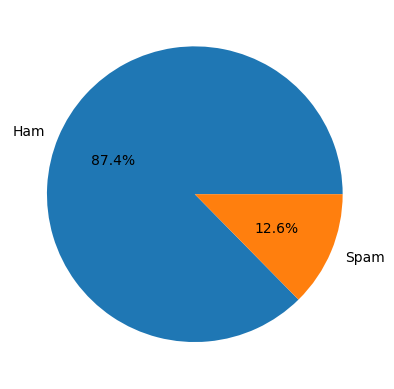

In [49]:
plt.pie(values,labels=label,autopct='%.1f%%')
plt.show()

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
naive_bayes_model=MultinomialNB()

In [52]:
naive_bayes_model.fit(X_train,y_train)

MultinomialNB()

In [53]:
nb_prediction=naive_bayes_model.predict(X_test)

In [54]:
print("naive bayes model")
print(confusion_matrix(y_test,nb_prediction))
print(classification_report(y_test,nb_prediction))
print("accuracy",accuracy_score(y_test,nb_prediction))
print("r2_score",r2_score(y_test,nb_prediction))


naive bayes model
[[889   0]
 [ 46  99]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

accuracy 0.9555125725338491
r2_score 0.6310150886311625


In [55]:
# for logistic regression 

In [57]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
pred_LR=LR.predict(X_test)
print(classification_report(y_test,pred_LR))
print("accuracy",accuracy_score(pred_LR,y_test))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.82       145

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034

accuracy 0.9555125725338491
